In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [ ]:

iris = load_iris()
X = iris.data
y_true = iris.target  # true labels for comparison

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
silhouette_scores = []
K_range = range(2, 11)

In [ ]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"k = {k}, Silhouette Score = {score:.4f}")

k = 2, Silhouette Score = 0.5818
k = 3, Silhouette Score = 0.4599
k = 4, Silhouette Score = 0.3869
k = 5, Silhouette Score = 0.3459
k = 6, Silhouette Score = 0.3171
k = 7, Silhouette Score = 0.3202
k = 8, Silhouette Score = 0.3387
k = 9, Silhouette Score = 0.3424
k = 10, Silhouette Score = 0.3518


In [ ]:
best_k = K_range[np.argmax(silhouette_scores)]
print(f"\nBest number of clusters (k) = {best_k}")


Best number of clusters (k) = 2


In [ ]:

kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_final.fit(X_scaled)

KMeans(n_clusters=2, n_init=10, random_state=42)

In [ ]:

labels = kmeans_final.labels_
centers = kmeans_final.cluster_centers_

cluster_sizes = pd.Series(labels).value_counts().sort_index()
print("\nCluster Sizes:")
print(cluster_sizes)

print("\nCluster Centers (Standardized Feature Space):")
print(pd.DataFrame(centers, columns=iris.feature_names))


Cluster Sizes:
0    100
1     50
Name: count, dtype: int64

Cluster Centers (Standardized Feature Space):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.507289         -0.426631           0.652494          0.627447
1          -1.014579          0.853263          -1.304987         -1.254893


In [ ]:
comparison = pd.crosstab(labels, y_true, rownames=['Cluster'], colnames=['True Species'])
print("\nMapping of Clusters to True Species:")
print(comparison)


Mapping of Clusters to True Species:
True Species   0   1   2
Cluster                 
0              0  50  50
1             50   0   0


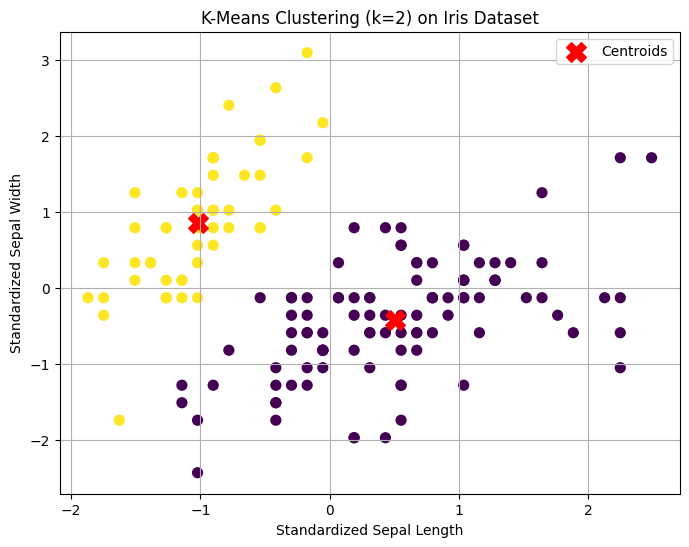

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Standardized Sepal Length')
plt.ylabel('Standardized Sepal Width')
plt.title(f'K-Means Clustering (k={best_k}) on Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()